In [1]:
import json
import pandas as pd
import numpy as np
from random import randrange
from matplotlib import pyplot as plt

***Problems 2016***

In [3]:
with open("C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/problems_2016.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)
df_expanded = pd.concat([pd.json_normalize(record) for record in df['data']], ignore_index=True)
problems_16 = df.drop(columns=['data']).join(df_expanded)

***Problems 2017 25***

In [4]:
with open("C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/problems_2017_25.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)
df_expanded = pd.concat([pd.json_normalize(record) for record in df['data']], ignore_index=True)
problems_17_25 = df.drop(columns=['data']).join(df_expanded)

***Problems 2017 40***

In [5]:
with open("C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/problems_2017_40.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)
df_expanded = pd.concat([pd.json_normalize(record) for record in df['data']], ignore_index=True)
problems_17_40 = df.drop(columns=['data']).join(df_expanded)

***Problems 2019 25***

In [6]:
with open("C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/problems_2019_25.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)
df_expanded = pd.concat([pd.json_normalize(record) for record in df['data']], ignore_index=True)
problems_19_25 = df.drop(columns=['data']).join(df_expanded)

***Problems 2019 40***

In [7]:
with open("C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/problems_2019_40.json", "r", encoding="utf-8") as file:
    data = json.load(file)

df = pd.DataFrame(data)
df_expanded = pd.concat([pd.json_normalize(record) for record in df['data']], ignore_index=True)
problems_19_40 = df.drop(columns=['data']).join(df_expanded)

In [8]:
print(problems_16["holdsetup.description"].value_counts())
print(problems_17_25["holdsetup.description"].value_counts())
print(problems_17_40["holdsetup.description"].value_counts())
print(problems_19_25["holdsetup.description"].value_counts())
print(problems_19_40["holdsetup.description"].value_counts())

holdsetup.description
MoonBoard 2016    59506
Name: count, dtype: int64
holdsetup.description
MoonBoard Masters 2017    10687
Name: count, dtype: int64
holdsetup.description
MoonBoard Masters 2017    44435
Name: count, dtype: int64
holdsetup.description
MoonBoard Masters 2019    3156
Name: count, dtype: int64
holdsetup.description
MoonBoard Masters 2019    21646
Name: count, dtype: int64


In [9]:
problems_16["holdsetup.description"] = "2016"
problems_17_25["holdsetup.description"] = "2017_25"
problems_17_40["holdsetup.description"] = "2017_40"
problems_19_25["holdsetup.description"] = "2019_25"
problems_19_40["holdsetup.description"] = "2019_40"

In [10]:
print(problems_16["holdsetup.description"].value_counts())
print(problems_17_25["holdsetup.description"].value_counts())
print(problems_17_40["holdsetup.description"].value_counts())
print(problems_19_25["holdsetup.description"].value_counts())
print(problems_19_40["holdsetup.description"].value_counts())

holdsetup.description
2016    59506
Name: count, dtype: int64
holdsetup.description
2017_25    10687
Name: count, dtype: int64
holdsetup.description
2017_40    44435
Name: count, dtype: int64
holdsetup.description
2019_25    3156
Name: count, dtype: int64
holdsetup.description
2019_40    21646
Name: count, dtype: int64


**MERGING**

In [11]:
data = pd.concat([problems_16, problems_17_25, problems_17_40, problems_19_25, problems_19_40], ignore_index=True)


In [12]:
data = data.drop(columns=['total'])
data = data.drop(columns=['setbyId'])
data = data.drop(columns=['moonBoardConfigurationId'])
data = data.drop(columns=['dateDeleted'])
data = data.drop(columns=['dateUpdated'])
data = data.drop(columns=['holdsetup.holdsets'])
data = data.drop(columns=['holdsetup.apiId'])

In [13]:
moves = data['moves']
holdsets = data['holdsets']

MOVES

In [14]:
moves.head()

0    [{'problemId': 19215, 'description': 'E6', 'is...
1    [{'problemId': 19216, 'description': 'F5', 'is...
2    [{'problemId': 19217, 'description': 'F5', 'is...
3    [{'problemId': 19218, 'description': 'B10', 'i...
4    [{'problemId': 19219, 'description': 'C5', 'is...
Name: moves, dtype: object

In [15]:
moves_expanded = pd.concat([pd.json_normalize(record) for record in moves], ignore_index=True)

In [16]:
moves_expanded.head(7)

,problemId,description,isStart,isEnd
0,19215,E6,True,False
1,19215,C5,True,False
2,19215,E8,False,False
3,19215,F11,False,False
4,19215,C13,False,False
5,19215,D15,False,False
6,19215,D18,False,True


HOLDSETS

In [17]:
holdsets.shape

(139430,)

In [18]:
holdsets

0         [{'description': 'Hold Set B', 'locations': No...
1         [{'description': 'Hold Set A', 'locations': No...
2         [{'description': 'Original School Holds', 'loc...
3         [{'description': 'Hold Set B', 'locations': No...
4         [{'description': 'Hold Set B', 'locations': No...
                                ...                        
139425    [{'description': 'Original School Holds', 'loc...
139426    [{'description': 'Original School Holds', 'loc...
139427    [{'description': 'Hold Set A', 'locations': No...
139428    [{'description': 'Original School Holds', 'loc...
139429    [{'description': 'Original School Holds', 'loc...
Name: holdsets, Length: 139430, dtype: object

In [19]:
descriptions = holdsets.apply(lambda x: '|'.join([d['description'] for d in x]))

holdsets_expanded = pd.DataFrame({'description': descriptions})

In [20]:
holdsets_expanded.head(25)

,description
0,Hold Set B
1,Hold Set A
2,Original School Holds|Hold Set A|Hold Set B
3,Hold Set B
4,Hold Set B
5,Original School Holds
6,Original School Holds
7,Hold Set A|Hold Set B
8,Hold Set A|Hold Set B
9,Original School Holds|Hold Set A|Hold Set B


In [21]:
holdsets_expanded["description"].value_counts()

description
Original School Holds|Hold Set A|Hold Set B                            32702
Hold Set A|Hold Set B                                                  24720
Hold Set A|Hold Set B|Hold Set C                                       12873
Original School Holds|Hold Set A|Hold Set B|Hold Set C                  8615
Original School Holds|Hold Set A|Hold Set B|Hold Set C|Wooden Holds     4963
                                                                       ...  
Wooden Holds|Wooden Holds B                                               43
Original School Holds|Wooden Holds|Wooden Holds B                         32
Hold Set B|Wooden Holds B                                                 31
Original School Holds|Wooden Holds B                                      19
Wooden Holds B                                                             5
Name: count, Length: 78, dtype: int64

In [22]:
holdsets_expanded.shape

(139430, 1)

In [23]:
data["holdsets"] = holdsets_expanded["description"]

In [24]:
data.head(10)

,name,grade,userGrade,setby,method,userRating,repeats,isBenchmark,isMaster,upgraded,downgraded,moves,holdsets,hasBetaVideo,apiId,dateInserted,holdsetup.description
0,Far from the Madding Crowd,6B+,6B+,Ben Moon,Feet follow hands,4,24993,True,False,False,False,"[{'problemId': 19215, 'description': 'E6', 'is...",Hold Set B,True,19215,2016-03-01T10:00:27,2016
1,Wuthering Heights,6B+,6B+,Ben Moon,Feet follow hands,4,35673,True,False,False,False,"[{'problemId': 19216, 'description': 'F5', 'is...",Hold Set A,True,19216,2016-03-01T10:00:27,2016
2,Problem 3,6B+,6B+,Ally Patrick,Feet follow hands,4,757,False,False,False,False,"[{'problemId': 19217, 'description': 'F5', 'is...",Original School Holds|Hold Set A|Hold Set B,False,19217,2016-03-01T10:00:16,2016
3,HARD TIMES,7A,7A,Ben Moon,Feet follow hands,5,8670,True,False,False,False,"[{'problemId': 19218, 'description': 'B10', 'i...",Hold Set B,True,19218,2016-03-01T10:00:15,2016
4,Problem 5,7A,7A,Ally Patrick,Feet follow hands,4,255,False,False,False,False,"[{'problemId': 19219, 'description': 'C5', 'is...",Hold Set B,False,19219,2016-03-01T10:00:15,2016
5,CRIME AND PUNISHMENT,7B,7B,Ben Moon,Feet follow hands,4,253,False,False,False,False,"[{'problemId': 19220, 'description': 'D3', 'is...",Original School Holds,True,19220,2016-03-01T10:00:15,2016
6,Shortround,6C+,6C+,Ally Patrick,Feet follow hands,4,550,False,False,False,False,"[{'problemId': 19221, 'description': 'D3', 'is...",Original School Holds,False,19221,2016-03-01T10:00:27,2016
7,Vurt,7B,7B,Ben Moon,Feet follow hands,4,1301,True,False,False,False,"[{'problemId': 19222, 'description': 'B3', 'is...",Hold Set A|Hold Set B,True,19222,2016-03-01T10:00:15,2016
8,Problem 9,7A+,7A+,Ally Patrick,Feet follow hands,4,2413,True,False,False,False,"[{'problemId': 19223, 'description': 'J5', 'is...",Hold Set A|Hold Set B,True,19223,2016-03-01T10:00:15,2016
9,Tess,6C+,6C+,Ben Moon,Feet follow hands,4,9617,True,False,False,False,"[{'problemId': 19224, 'description': 'F5', 'is...",Original School Holds|Hold Set A|Hold Set B,True,19224,2016-03-01T10:00:15,2016


GRID

In [32]:
griglia = pd.get_dummies(moves_expanded[['problemId', 'description']], columns=['description'])

griglia = griglia.groupby('problemId').sum()

griglia.columns = griglia.columns.str.replace("description_", "")

moves_expanded['value'] = moves_expanded.apply(
    lambda row: 2 if row['isStart'] == True else (3 if row['isEnd'] == True else 1), axis=1
)

# Crea la griglia con i nuovi valori
griglia = pd.pivot_table(
    moves_expanded, 
    values='value', 
    index='problemId', 
    columns='description', 
    aggfunc='max', 
    fill_value=0
)

# Rinomina le colonne per rimuovere il prefisso 'description_'
griglia.columns = griglia.columns.str.replace("description_", "")

print(griglia.head())

description  A1  A10  A11  A12  A13  A14  A15  A16  A17  A18  ...  K18  K2  \
problemId                                                     ...            
19215         0    0    0    0    0    0    0    0    0    0  ...    0   0   
19216         0    0    0    0    0    0    0    0    0    0  ...    0   0   
19217         0    0    0    0    0    0    0    0    0    0  ...    0   0   
19218         0    0    0    0    0    0    0    0    0    0  ...    0   0   
19219         0    0    0    0    0    0    0    0    0    0  ...    0   0   

description  K3  K4  K5  K6  K7  K8  K9  j5  
problemId                                    
19215         0   0   0   0   0   0   0   0  
19216         0   0   0   0   0   0   0   0  
19217         0   0   0   0   0   0   0   0  
19218         0   0   0   0   0   0   0   0  
19219         0   0   0   0   0   0   0   0  

[5 rows x 199 columns]


In [33]:
griglia.loc[19215]

description
A1     0
A10    0
A11    0
A12    0
A13    0
      ..
K6     0
K7     0
K8     0
K9     0
j5     0
Name: 19215, Length: 199, dtype: int64

In [34]:
columns = [f"{letter}{number}" for letter in "ABCDEFGHIJK" for number in range(1, 19)]

griglia = griglia.reindex(columns=columns, fill_value=0)

print(griglia.head())

description  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  ...  K9  K10  K11  K12  \
problemId                                             ...                      
19215         0   0   0   0   0   0   0   0   0    0  ...   0    0    0    0   
19216         0   0   0   0   0   0   0   0   0    0  ...   0    0    1    0   
19217         0   0   0   0   0   0   0   0   0    0  ...   0    0    0    0   
19218         0   0   0   0   0   0   0   0   0    0  ...   0    0    0    0   
19219         0   0   0   0   0   0   0   0   1    0  ...   0    0    0    0   

description  K13  K14  K15  K16  K17  K18  
problemId                                  
19215          0    0    0    0    0    0  
19216          0    0    0    0    0    0  
19217          0    0    0    0    0    0  
19218          0    0    0    0    0    0  
19219          0    0    0    0    0    0  

[5 rows x 198 columns]


In [35]:
griglia.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       ...
       'K9', 'K10', 'K11', 'K12', 'K13', 'K14', 'K15', 'K16', 'K17', 'K18'],
      dtype='object', name='description', length=198)

In [36]:
n = griglia.shape[0]
print(n)

139430


In [37]:
data

,name,grade,userGrade,setby,method,userRating,repeats,isBenchmark,isMaster,upgraded,downgraded,moves,holdsets,hasBetaVideo,apiId,dateInserted,holdsetup.description
0,Far from the Madding Crowd,6B+,6B+,Ben Moon,Feet follow hands,4,24993,True,False,False,False,"[{'problemId': 19215, 'description': 'E6', 'is...",Hold Set B,True,19215,2016-03-01T10:00:27,2016
1,Wuthering Heights,6B+,6B+,Ben Moon,Feet follow hands,4,35673,True,False,False,False,"[{'problemId': 19216, 'description': 'F5', 'is...",Hold Set A,True,19216,2016-03-01T10:00:27,2016
2,Problem 3,6B+,6B+,Ally Patrick,Feet follow hands,4,757,False,False,False,False,"[{'problemId': 19217, 'description': 'F5', 'is...",Original School Holds|Hold Set A|Hold Set B,False,19217,2016-03-01T10:00:16,2016
3,HARD TIMES,7A,7A,Ben Moon,Feet follow hands,5,8670,True,False,False,False,"[{'problemId': 19218, 'description': 'B10', 'i...",Hold Set B,True,19218,2016-03-01T10:00:15,2016
4,Problem 5,7A,7A,Ally Patrick,Feet follow hands,4,255,False,False,False,False,"[{'problemId': 19219, 'description': 'C5', 'is...",Hold Set B,False,19219,2016-03-01T10:00:15,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139425,The dolphin again,6B+,None,Miller,Feet follow hands,0,0,False,False,False,False,"[{'problemId': 462545, 'description': 'G11', '...",Original School Holds|Hold Set A|Hold Set B|Wo...,False,462545,2023-01-30T18:27:20.857,2019_40
139426,Yummy,6C+,None,mr,Feet follow hands,0,0,False,False,False,False,"[{'problemId': 462555, 'description': 'F6', 'i...",Original School Holds|Hold Set B|Wooden Holds ...,False,462555,2023-01-30T19:10:08.603,2019_40
139427,Christmas 1,6A+,None,Arsanmun,Feet follow hands,0,0,False,False,False,False,"[{'problemId': 462558, 'description': 'A5', 'i...",Hold Set A|Hold Set B|Wooden Holds B|Wooden Ho...,False,462558,2023-01-30T19:22:14.233,2019_40
139428,t+v,6C+,None,episkeptis0,Feet follow hands,0,0,False,False,False,False,"[{'problemId': 462565, 'description': 'D4', 'i...",Original School Holds|Hold Set A|Wooden Holds ...,False,462565,2023-01-30T20:12:15.63,2019_40


In [38]:
data_full = data.merge(griglia, left_on='apiId', right_index=True, how='left')
data_full.head(10)

,name,grade,userGrade,setby,method,userRating,repeats,isBenchmark,isMaster,upgraded,...,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18
0,Far from the Madding Crowd,6B+,6B+,Ben Moon,Feet follow hands,4,24993,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,Wuthering Heights,6B+,6B+,Ben Moon,Feet follow hands,4,35673,True,False,False,...,0,0,1,0,0,0,0,0,0,0
2,Problem 3,6B+,6B+,Ally Patrick,Feet follow hands,4,757,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,HARD TIMES,7A,7A,Ben Moon,Feet follow hands,5,8670,True,False,False,...,0,0,0,0,0,0,0,0,0,0
4,Problem 5,7A,7A,Ally Patrick,Feet follow hands,4,255,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5,CRIME AND PUNISHMENT,7B,7B,Ben Moon,Feet follow hands,4,253,False,False,False,...,0,0,0,0,0,0,0,0,0,0
6,Shortround,6C+,6C+,Ally Patrick,Feet follow hands,4,550,False,False,False,...,0,0,0,0,0,0,0,0,0,0
7,Vurt,7B,7B,Ben Moon,Feet follow hands,4,1301,True,False,False,...,0,0,0,0,0,0,0,0,0,0
8,Problem 9,7A+,7A+,Ally Patrick,Feet follow hands,4,2413,True,False,False,...,0,0,0,0,0,0,0,0,0,0
9,Tess,6C+,6C+,Ben Moon,Feet follow hands,4,9617,True,False,False,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data_full = data_full.drop(columns=['moves'])

In [40]:
print(data_full.shape)
print(data_full.columns)
print(data_full.head(10))

(139430, 214)
Index(['name', 'grade', 'userGrade', 'setby', 'method', 'userRating',
       'repeats', 'isBenchmark', 'isMaster', 'upgraded',
       ...
       'K9', 'K10', 'K11', 'K12', 'K13', 'K14', 'K15', 'K16', 'K17', 'K18'],
      dtype='object', length=214)
                         name grade userGrade         setby  \
0  Far from the Madding Crowd   6B+       6B+      Ben Moon   
1           Wuthering Heights   6B+       6B+      Ben Moon   
2                   Problem 3   6B+       6B+  Ally Patrick   
3                  HARD TIMES    7A        7A      Ben Moon   
4                   Problem 5    7A        7A  Ally Patrick   
5        CRIME AND PUNISHMENT    7B        7B      Ben Moon   
6                  Shortround   6C+       6C+  Ally Patrick   
7                        Vurt    7B        7B      Ben Moon   
8                   Problem 9   7A+       7A+  Ally Patrick   
9                        Tess   6C+       6C+      Ben Moon   

              method  userRating  repeats  

In [49]:
data_full.to_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_problems.csv', index=True, encoding='utf-8')

In [54]:
data_full = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_problems.csv', index_col=0, encoding='utf-8')
data_full.head(10)

C:\Users\fra24\AppData\Local\Temp\ipykernel_10940\3592027311.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  data_full = pd.read_csv('C:/Users/fra24/OneDrive/Documenti/uni/magistrale/tesi/data/moonboard_problems.csv', index_col=0, encoding='utf-8')


,name,grade,userGrade,setby,method,userRating,repeats,isBenchmark,isMaster,upgraded,...,K9,K10,K11,K12,K13,K14,K15,K16,K17,K18
0,Far from the Madding Crowd,6B+,6B+,Ben Moon,Feet follow hands,4,24993,True,False,False,...,0,0,0,0,0,0,0,0,0,0
1,Wuthering Heights,6B+,6B+,Ben Moon,Feet follow hands,4,35673,True,False,False,...,0,0,1,0,0,0,0,0,0,0
2,Problem 3,6B+,6B+,Ally Patrick,Feet follow hands,4,757,False,False,False,...,0,0,0,0,0,0,0,0,0,0
3,HARD TIMES,7A,7A,Ben Moon,Feet follow hands,5,8670,True,False,False,...,0,0,0,0,0,0,0,0,0,0
4,Problem 5,7A,7A,Ally Patrick,Feet follow hands,4,255,False,False,False,...,0,0,0,0,0,0,0,0,0,0
5,CRIME AND PUNISHMENT,7B,7B,Ben Moon,Feet follow hands,4,253,False,False,False,...,0,0,0,0,0,0,0,0,0,0
6,Shortround,6C+,6C+,Ally Patrick,Feet follow hands,4,550,False,False,False,...,0,0,0,0,0,0,0,0,0,0
7,Vurt,7B,7B,Ben Moon,Feet follow hands,4,1301,True,False,False,...,0,0,0,0,0,0,0,0,0,0
8,Problem 9,7A+,7A+,Ally Patrick,Feet follow hands,4,2413,True,False,False,...,0,0,0,0,0,0,0,0,0,0
9,Tess,6C+,6C+,Ben Moon,Feet follow hands,4,9617,True,False,False,...,0,0,0,0,0,0,0,0,0,0


VISUALITATION

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_observation(df, apiId):
    relevant_columns = sorted(
        [col for col in df.columns if col[0] in "ABCDEFGHIJK" and col[1:].isdigit()],
        key=lambda x: (x[0], int(x[1:]))
    )
    
    if not relevant_columns:
        print("Nessuna colonna rilevante trovata (A1-K18).")
        return
    
    row = df[df['apiId'] == apiId]
    if row.empty:
        print(f"apiId {apiId} non trovato.")
        return

    name = row['name'].values[0]

    try:
        obs = row[relevant_columns].to_numpy().reshape((11, 18))  # (Y=18, X=11)
    except ValueError as e:
        print(f"Errore durante il reshape: {e}")
        print(f"Assicurati che ci siano esattamente 198 valori (18x11) per apiId {apiId}.")
        return

    # Ruota la matrice di 90 gradi a sinistra
    obs_rotated = np.transpose(obs)[::-1]

    obs = obs_rotated

    # Definisci una mappa di colori personalizzata
    cmap = ListedColormap(["white", "black", "green", "red"])
    bounds = [0, 1, 2, 3, 4]
    norm = plt.Normalize(vmin=0, vmax=3)

    plt.figure(figsize=(6, 6))
    plt.imshow(obs, cmap=cmap, norm=norm, aspect="equal")  

    plt.yticks(ticks=np.arange(18), labels=np.arange(18, 0, -1))  # X da 'A' a 'K'
    plt.xticks(ticks=np.arange(11), labels=list("ABCDEFGHIJK"))  # Y da 18 a 1

    plt.title(f"Problem: {name}")

    plt.show()

    filtered_row = data_full[data_full['apiId'] == apiId]

    if not filtered_row.empty:
        print("Grade:", filtered_row['grade'].values[0])
        print("User Grade:", filtered_row['userGrade'].values[0])
        print("Repeats:", filtered_row['repeats'].values[0])
        print("SetBy:", filtered_row['setby'].values[0])
        print("HoldSetup.Description:", filtered_row['holdsetup.description'].values[0])
        print("Benchmark:", filtered_row['isBenchmark'].values[0])
    else:
        print("Nessuna osservazione trovata")

In [42]:
import random

def random_apiId_generator(df):
    api_ids = df['apiId'].unique()
    
    while True:
        yield random.choice(api_ids)

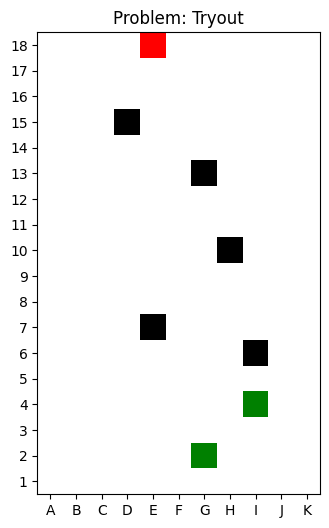

Grade: 6B+
User Grade: None
Repeats: 3
SetBy: Johan Vedefors
HoldSetup.Description: 2016
Benchmark: False


In [44]:
apiId_gen = random_apiId_generator(data_full)
x = next(apiId_gen)
plot_observation(data_full, apiId=x)